<a href="https://colab.research.google.com/github/ColbyHunterSmith/ColbyHunterSmith/blob/main/MorganFingeprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install rdkit-pypi -qqq
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 23.5 MB/s eta 0:00:00


In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
from google.colab import files
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

# Upload the Excel file containing SMILES, HOMO, LUMO, and F/F data
uploaded = files.upload()

# Read the uploaded Excel file
df = pd.read_excel(next(iter(uploaded)))

# Extract SMILES, HOMO, LUMO, and F/F columns
smiles_column = df.iloc[:, 0].str.split('\t', expand=True)[0]
homo_column = df.iloc[:, 2]
lumo_column = df.iloc[:, 3]
ff_column = df.iloc[:, 5]

# Convert SMILES column to a list
smiles_list = df.iloc[:, 0].str.split('\t', expand=True)[0].to_list()

# Convert HOMO, LUMO, and F/F columns to numeric arrays
homo_values = homo_column.to_numpy().astype(float)
lumo_values = lumo_column.to_numpy().astype(float)
ff_values = ff_column.to_numpy().astype(float)

# Create RDKit Mol objects from SMILES
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Generate fingerprints using RDKit's Morgan fingerprint
fingerprints = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in mols]

# Create 'values' array from the 6th column (df/f values)
values = ff_values

# Create 'labels' array based on positive and negative numbers
labels = np.where(ff_values > 0, 1, 0)

# Print the length of the molecule and fingerprint lists
print(f"Number of molecules: {len(mols)}")
print(smiles_list)
print(f"Number of fingerprints: {len(fingerprints)}")
print(labels)


Saving smiles (2).xlsx to smiles (2).xlsx
Number of molecules: 63
['c1(cccc(c1)O)O', 'c1(ccccc1S)S', 'c1(c(cncc1)O)O', 'c1c(c2c(cc1)cccc2O)O', 'c12c(ccc(c1)O)[nH]cc2CCN', 'c1ccc(c(=O)cc1)O', 'c1(c(cc(cc1)C(C)(C)C)O)O', 'c12c(ccc(c1)OC)[nH]cc2CCNC(=O)C', 'c1c(c(ccc1[C@H](CN)O)O)O', 'c12c(cc(c(c1)O)O)cc[nH]2', 'c1(ccc(c(c1)O)O)Cl', 'OC([C@H](O)[C@@H](O)C(O)=O)=O', 'c1(ccc(c(c1)O)O)C(=O)O', 'C(=O)([C@@H]([C@H](C(=O)O)O)O)O', 'c1c(c(ccc1O)O)O', 'c1(ccccc1C=O)C=O', 'c1c(c(ccc1CC)O)O', 'c1(CCN)ccc(c(c1)O)O', 'c1(c(cccc1)OC)OC', 'C1=C(C(=O)C(=O)C=C1C(C)(C)C)C(C)(C)C', 'c1c(c(c(cc1)O)O)OC', 'c1(c(cc(cc1)N)O)O', 'c1(ccccc1O)C=O', 'c1(ccccc1O)CO', 'c1(ccccc1O)OC', 'c1(ccccc1CO)CO', 'OC1=CC([N+]([O-])=O)=CC=C1O', 'c1(c(cc(cc1)C(=O)C)O)O', 'c1(ccc(c(c1)O)O)C(=O)OC', 'c1ccccc1C(=O)CO', 'c1ccccc1[C@@H](C(=O)O)O', 'c1cc(c(cc1C#N)O)O', 'c1(c(ccc(c1)OC)O)O', 'c1(c(cc(cc1)C=O)O)O', 'c1c(c(cc(c1)C=O)O)O', 'c1(c(nccc1)O)O', 'c1cc(c(c(c1)F)O)O', 'c1(cc(cc(c1)O)O)O', 'c1(c(cccc1)O)N', 'c1cc(ccc1O)[C@H](CN)O

In [11]:

print(smiles_column)

0               c1(cccc(c1)O)O
1                 c1(ccccc1S)S
2               c1(c(cncc1)O)O
3         c1c(c2c(cc1)cccc2O)O
4     c12c(ccc(c1)O)[nH]cc2CCN
                ...           
58             c12c(cccc1)OCO2
59             c1(cc(ccc1O)C)O
60       c12c(cccc1)[nH]cc2CCN
61             c1cc(ccc1C=O)OC
62            c1(ccc(cc1)CCN)O
Name: 0, Length: 63, dtype: object


Feature Probabilities:
Average Accuracy: 0.8896153846153847
Average F1 Score: 0.8894558150827501
Average Recall: [0.87831548 0.90971194]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.89      0.94         9

    accuracy                           0.92        13
   macro avg       0.90      0.94      0.92        13
weighted avg       0.94      0.92      0.93        13



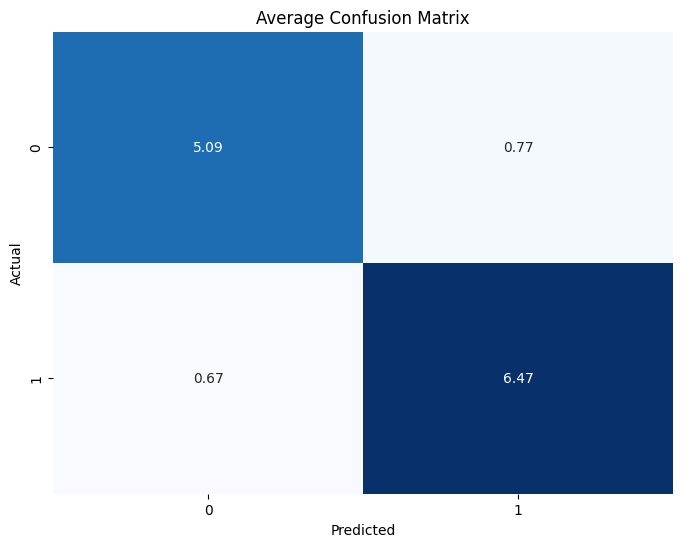

In [12]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=i)
    rf_model.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = rf_model.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')

print(classification_report(y_test, y_pred))

# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(rf_model).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
#files.download(output_file)




In [9]:
print(features)

[[ 0.          0.          0.         ... -6.2311376  -0.45252552
  -0.12      ]
 [ 0.          1.          0.         ... -6.58025981 -0.9959371
   1.82      ]
 [ 0.          0.          0.         ... -6.70788126 -0.87838387
  -0.04      ]
 ...
 [ 0.          0.          0.         ... -5.70813457 -0.2
  -0.08      ]
 [ 0.          0.          0.         ... -6.68556792 -1.5
  -0.2       ]
 [ 0.          0.          0.         ... -6.22079727  0.
  -0.07      ]]


Feature Probabilities:
Average Accuracy: 1.0
Average F1 Score: 1.0
Average Recall: [1. 1.]


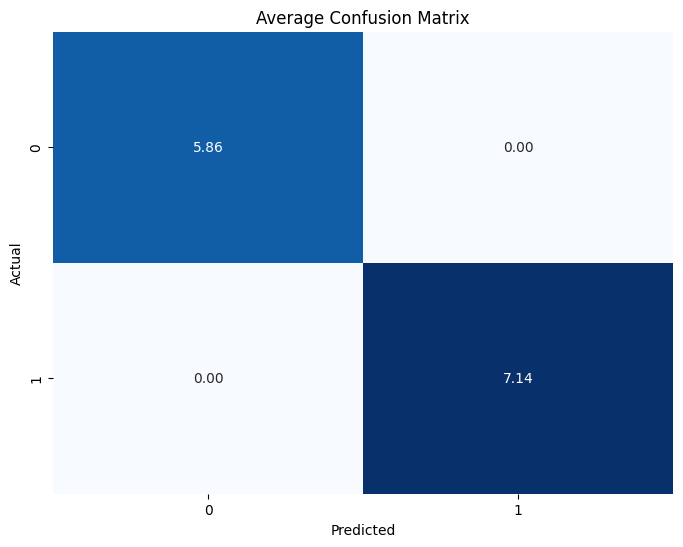

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#AdaBoostClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a AdaBoost
    ada_model = AdaBoostClassifier(n_estimators=100, random_state=i)
    ada_model.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = ada_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = ada_model.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(ada_model).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)




Feature Probabilities:
Average Accuracy: 1.0
Average F1 Score: 1.0
Average Recall: [1. 1.]


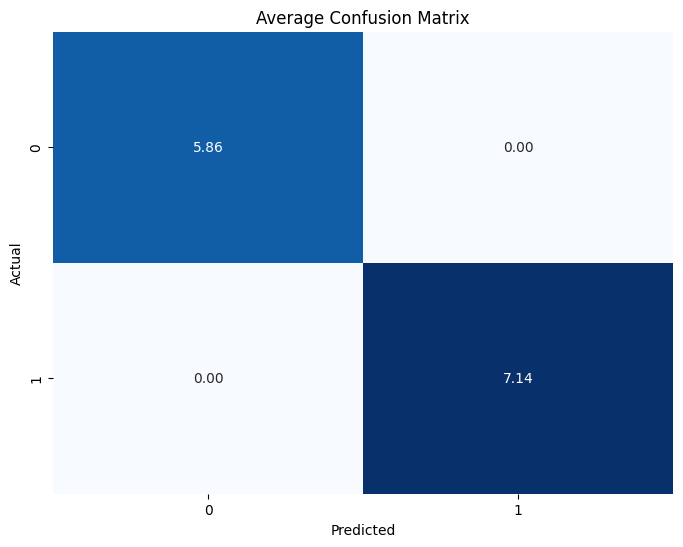

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#BaggingClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    bag_model = BaggingClassifier(n_estimators=100, random_state=i)
    bag_model.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = bag_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = bag_model.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(bag_model).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)


Feature Probabilities:
Average Accuracy: 0.7823076923076923
Average F1 Score: 0.7726019392973726
Average Recall: [0.63230556 0.92503499]


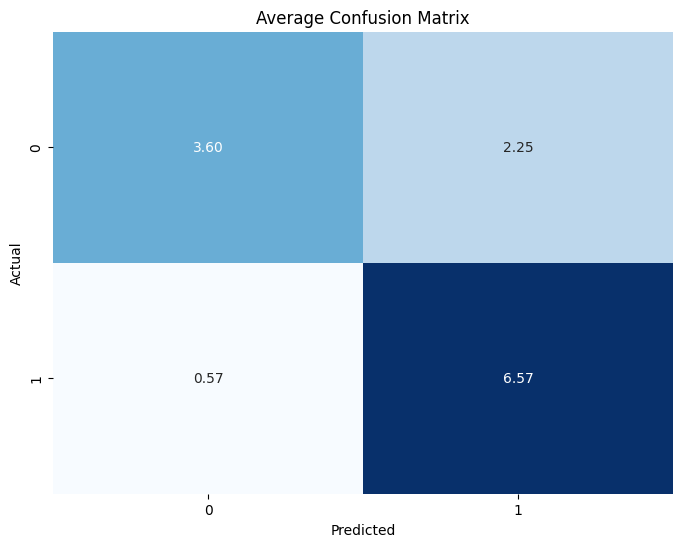

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#ComplementNB

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Apply data scaling to ensure non-negative values
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Complement Naive Bayes model
    nb_model = ComplementNB()
    nb_model.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = nb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = nb_model.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(nb_model).__name__
fingerprint_name = "MGN"  # MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)


Feature Probabilities:
Average Accuracy: 1.0
Average F1 Score: 1.0
Average Recall: [1. 1.]


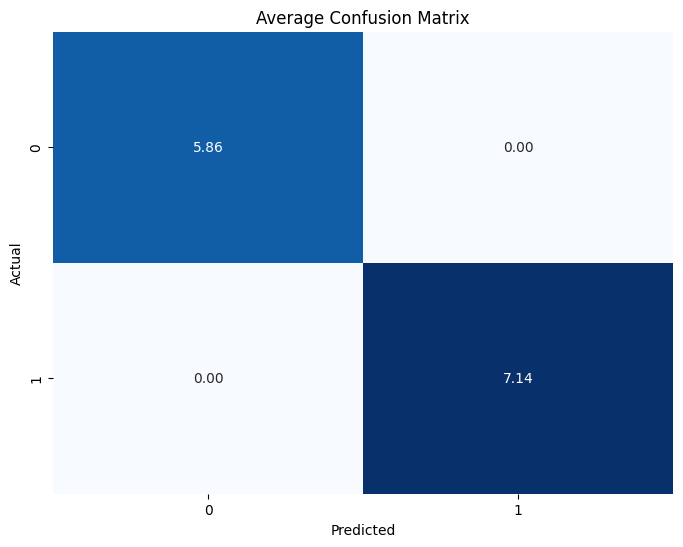

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    decisionTree_model = DecisionTreeClassifier(random_state=i)# This classifier does not offer an estimator parameter, do not add it.
    decisionTree_model.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = decisionTree_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = decisionTree_model.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(decisionTree_model).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)

Feature Probabilities:
Average Accuracy: 0.7215384615384616
Average F1 Score: 0.7160151393584056
Average Recall: [0.66578175 0.77365368]


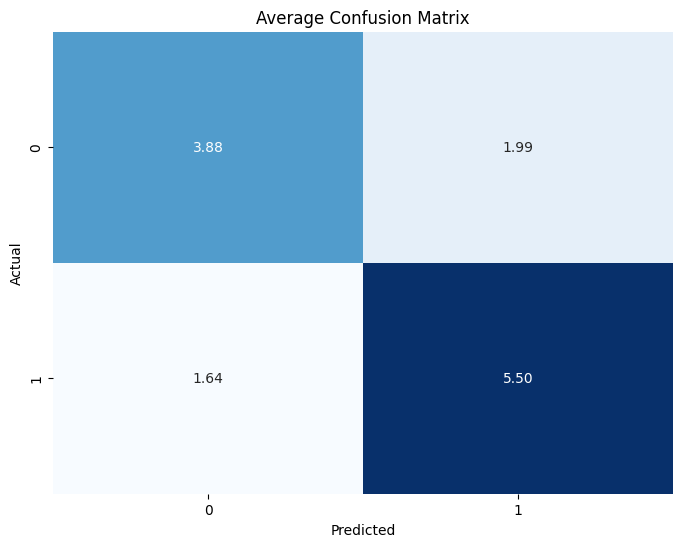

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#ExtraTreeClassifier

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    extraTree_model = ExtraTreeClassifier(random_state=i)#This model does not offer estimators as a parameter.
    extraTree_model.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = extraTree_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = extraTree_model.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(extraTree_model).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)


Feature Probabilities:
Average Accuracy: 0.791923076923077
Average F1 Score: 0.7903546194517557
Average Recall: [0.75498611 0.83556313]


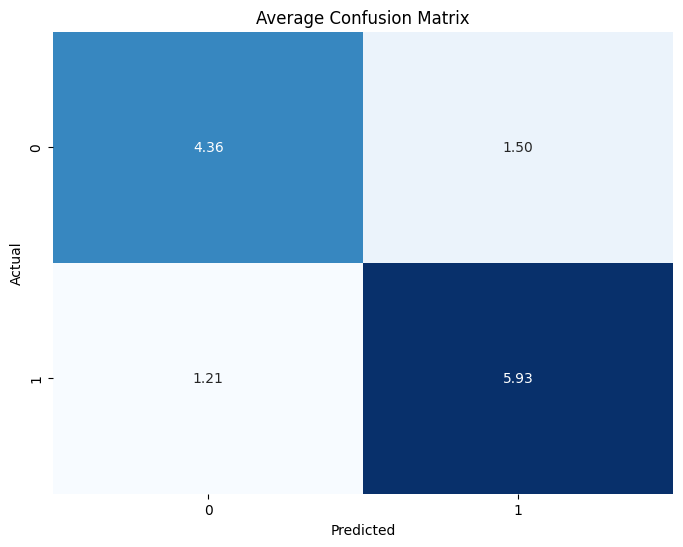

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#ExtraTreesClassifier

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    extraTrees_model = ExtraTreesClassifier(random_state=i)
    extraTrees_model.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = extraTrees_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = extraTrees_model.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(extraTrees_model).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)


Feature Probabilities:
Average Accuracy: 1.0
Average F1 Score: 1.0
Average Recall: [1. 1.]


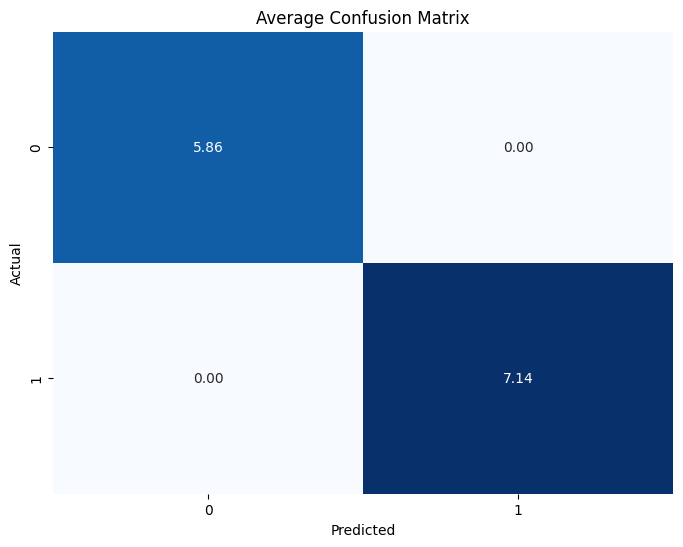

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#GradientBoostingClassifier

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    gb_model = GradientBoostingClassifier(random_state=i)
    gb_model.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = gb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = gb_model.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(gb_model).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)


Feature Probabilities:
Average Accuracy: 0.8661538461538462
Average F1 Score: 0.8664610063139476
Average Recall: [0.88775595 0.86335119]


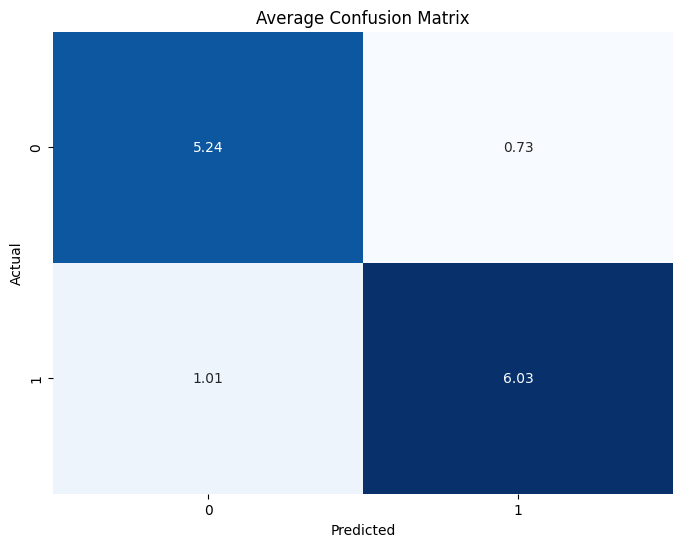

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#KNeighborsClassifier

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
#random.seed(50)
#np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    Kneighbors_model = KNeighborsClassifier(n_neighbors = 4)
    Kneighbors_model.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = Kneighbors_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = Kneighbors_model.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(Kneighbors_model).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)


Feature Probabilities:
Average Accuracy: 0.8765384615384616
Average F1 Score: 0.8762104468458958
Average Recall: [0.87222619 0.88540043]


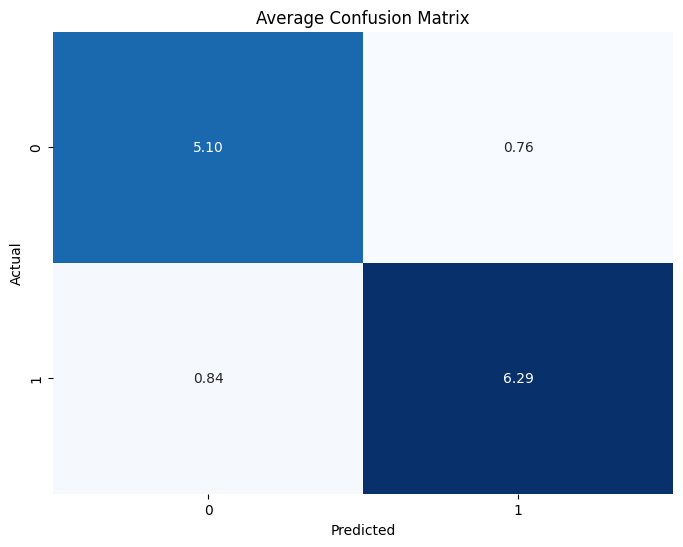

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#LinearSVC

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    lsvc = LinearSVC(random_state=i)
    lsvc.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = lsvc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    decision_values = lsvc.decision_function(X_test)

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(lsvc).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)


Feature Probabilities:
Average Accuracy: 0.8938461538461538
Average F1 Score: 0.8939223915489396
Average Recall: [0.91222222 0.88640025]


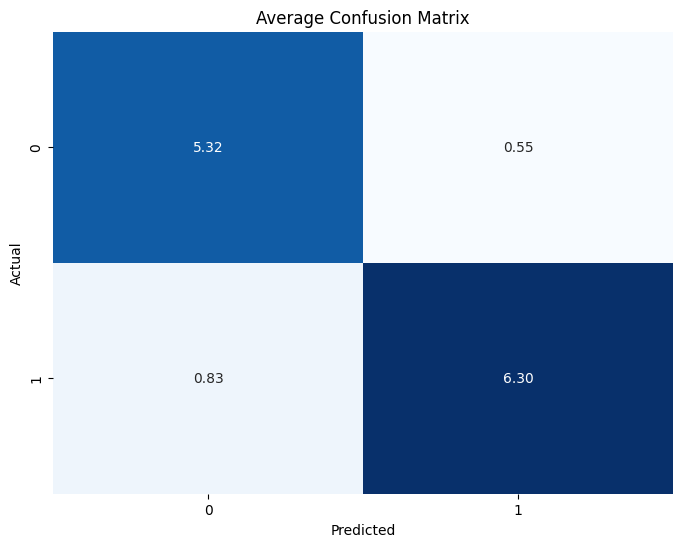

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#LogisticRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    lr = LogisticRegression(random_state=i)
    lr.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = lr.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(lr).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)

Feature Probabilities:
Average Accuracy: 0.8257692307692309
Average F1 Score: 0.8234489955778657
Average Recall: [0.75782738 0.89239863]


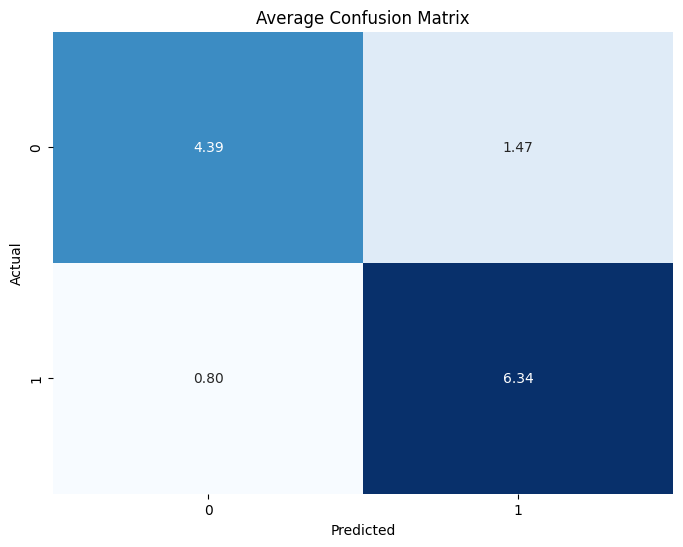

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    mlp = MLPClassifier(random_state=i)
    mlp.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = mlp.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(mlp).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)

Feature Probabilities:
Average Accuracy: 0.7769230769230768
Average F1 Score: 0.7663064772344959
Average Recall: [0.62066071 0.92737428]


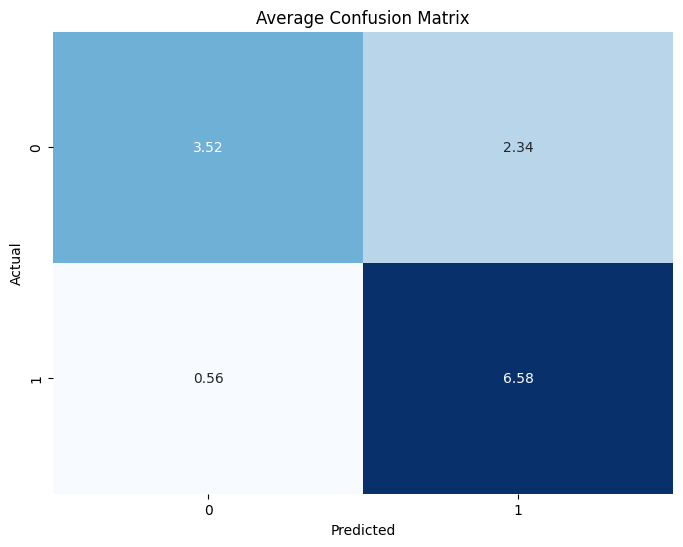

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#MultinomalNB

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Apply data scaling to ensure non-negative values
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    mnnb = MultinomialNB()
    mnnb.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = mnnb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = mnnb.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(mnnb).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)


Feature Probabilities:
Average Accuracy: 0.9034615384615386
Average F1 Score: 0.9031467800775076
Average Recall: [0.99746032 0.82850938]


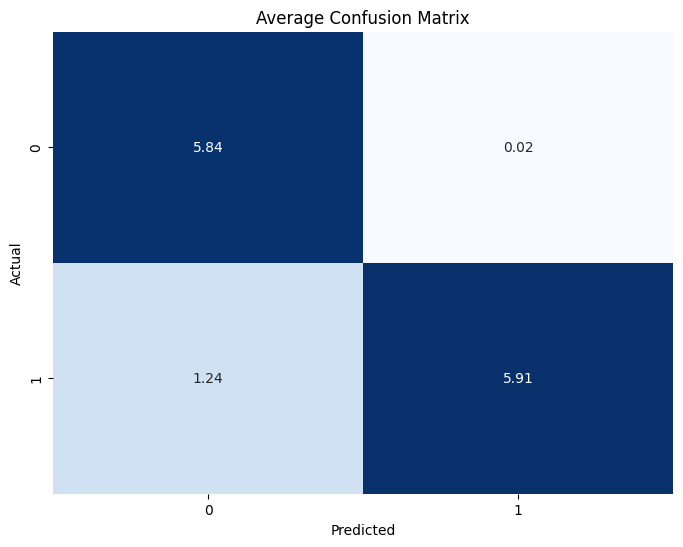

TypeError: ignored

In [ ]:

#NearestCentroid
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a NearestCentroid Model
    nc = NearestCentroid()
    nc.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = nc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)

    # Store the evaluation metrics, confusion matrix, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(None)  # No predicted probabilities available
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], [None]*len(X_test))))

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(None)  # No probabilities available
    else:
        feature_probabilities_avg[feature] = [None]  # No probabilities available

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')

# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = 0  # No probabilities available
        percentage_0 = 0  # No probabilities available

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(nc).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)


In [ ]:
#NearestCentroid

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    ovo = OneVsOneClassifier( estimator = NearestCentroid())
    ovo.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = ovo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = ovo.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(ovo).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)


AttributeError: ignored

In [ ]:
#OutputCodeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OutputCodeClassifier
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Apply data scaling to ensure non-negative values
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
decision_scores = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    mnnb = MultinomialNB()
    clf = OutputCodeClassifier(mnnb, code_size=2, random_state=0)
    clf.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    decision = clf.decision_function(X_test)  # Get the decision scores

    # Store the evaluation metrics, confusion matrix, decision scores, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    decision_scores.append(decision)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], decision)))  # Store index, features, and their decision scores

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(decision_scores[idx])
    else:
        feature_probabilities_avg[feature] = [decision_scores[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Decision_Score': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        decision_scores = feature_probabilities_avg[feature]
        avg_decision_scores = np.mean(decision_scores, axis=0)
        decision_score = avg_decision_scores.mean()

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Decision_Score'].append(decision_score)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(clf.estimators_[0]).__name__
fingerprint_name = "MGN"  # MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and decision scores to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, decision_score in enumerate(decision_scores):
        decision_df = pd.DataFrame(decision_score, columns=['Decision_Score'])
        decision_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Decision_Scores')

# Download the Excel file
files.download(output_file)


AttributeError: ignored

In [ ]:
Daylight, Torsion, Avalon,